# Análisis de Datos

### Alumnos:

* Paola Andrea Blanco     **(a2303)**
* Facundo Manuel Quiroga  **(a2305)**
* Juan Manuel Fajardo     **(a2310)**
* Victor Gabriel Peralta  **(a2322)**
* Agustín Jesús Vazquez   **(e2301)**

## 1. Introducción al dataset y objetivos del análisis

El conjunto de datos **NYPD Complaint Data Current Year-To-Date** contiene todos los delitos denunciados ante el Departamento de Policía de la Ciudad de Nueva York (NYPD) en lo que va del año actual. Incluye delitos de tipo felonía, delito menor y violación (infracciones), con detalles sobre la fecha, ubicación y descripciones del incidente, así como datos demográficos de víctimas y sospechosos. Este dataset público es provisto por la iniciativa NYC Open Data y se actualiza trimestralmente, sirviendo como recurso para analizar tendencias de criminalidad en la ciudad.

En este notebook realizaremos un Análisis Exploratorio de Datos (EDA) con un enfoque educativo. Los objetivos principales son:

* Familiarizarnos con la estructura y contenido del dataset (dimensiones, tipos de datos, primeras observaciones).

* Realizar una limpieza inicial de datos, manejando valores nulos y duplicados si los hubiera.

* Explorar la distribución de variables univariadas: frecuencias de categorías principales y distribución de alguna variable numérica si corresponde.

* Analizar relaciones multivariadas simples, por ejemplo, cómo varía la cantidad de delitos según el barrio (borough) o a través del tiempo (meses/días).

* Identificar y discutir la presencia de valores faltantes y los posibles mecanismos detrás de su ausencia (MCAR, MAR, MNAR).

* Detectar valores atípicos (outliers) en alguna variable numérica usando el método del rango intercuartílico (IQR) y visualizarlos con gráficos de caja (boxplot).

* Finalmente, resumir las observaciones clave obtenidas del análisis (sin entrar en modelado predictivo).

Fuente: 
* https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/about_data
* https://catalog.data.gov/dataset/nypd-complaint-data-current-year-to-date#:~:text=This%20dataset%20includes%20all%20valid,dictionary%20in%20the%20%E2%80%98About%E2%80%99%20section

## 2. Carga de datos desde URL pública con pandas

In [14]:
# Importamos librerías necesarias para el desarrollo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

Importamos dataset para cargar en un dataframe

In [3]:
# URL del dataset (CSV de NYPD Complaint Data Year-To-Date)
url = "https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD"

# Cargar los datos en un DataFrame de pandas
df = pd.read_csv(url)

## 3. Revisión general del dataset (shape, tipos de datos, primeras filas)

Una vez cargados los datos en df, revisemos su contenido de manera general:

* Dimensiones del dataset: número de filas (registros de denuncias) y columnas (atributos por denuncia).

* Tipos de datos de cada columna, para entender si pandas interpretó correctamente fechas, números y textos.

* Primeras filas del DataFrame, para observar cómo vienen estructurados los datos.

In [4]:
# Dimensiones del DataFrame
print("Dimensiones del dataset:", df.shape)  # (filas, columnas)

# Tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df.dtypes)

# Mostrar las primeras 5 filas del dataset
print("\nPrimeras filas:")
display(df.head(5))

# Mostrar las últimas 5 filas del dataset
print("\nÚltimas filas:")
display(df.tail())

Dimensiones del dataset: (438556, 36)

Tipos de datos por columna:
CMPLNT_NUM                   object
ADDR_PCT_CD                   int64
BORO_NM                      object
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT                 object
CMPLNT_TO_TM                 object
CRM_ATPT_CPTD_CD             object
HADEVELOPT                   object
HOUSING_PSA                 float64
JURISDICTION_CODE             int64
JURIS_DESC                   object
KY_CD                         int64
LAW_CAT_CD                   object
LOC_OF_OCCUR_DESC            object
OFNS_DESC                    object
PARKS_NM                     object
PATROL_BORO                  object
PD_CD                       float64
PD_DESC                      object
PREM_TYP_DESC                object
RPT_DT                       object
STATION_NAME                 object
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     obje

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,303250435,13,MANHATTAN,03/20/2025,00:30:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,WHITE,M,988886,207857,40.737203,-73.983273,"(40.7372030985741, -73.9832725981497)",POINT (-73.9832725981497 40.7372030985741)
1,298788022,81,BROOKLYN,01/02/2025,01:50:00,01/02/2025,03:00:00,COMPLETED,(null),NaN,...,NaN,18-24,WHITE,F,1005319,190473,40.689464,-73.924029,"(40.6894642952604, -73.9240290899499)",POINT (-73.9240290899499 40.6894642952604)
2,307271594,47,BRONX,03/05/2025,17:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,1026480,262584,40.887314,-73.847272,"(40.8873136344706, -73.8472717577564)",POINT (-73.8472717577564 40.8873136344706)
3,306868358,9,MANHATTAN,05/22/2025,14:30:00,05/22/2025,14:45:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,M,0,0,0.000000,0.000000,"(0.0, 0.0)",POINT (0 0)
4,309137838,14,MANHATTAN,07/05/2025,18:00:00,07/05/2025,18:31:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,0,0,0.000000,0.000000,"(0.0, 0.0)",POINT (0 0)



Últimas filas:


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
438551,307965316,105,QUEENS,06/10/2025,20:00:00,06/10/2025,20:10:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,M,1055720,191850,40.692981,-73.742274,"(40.692981, -73.742274)",POINT (-73.742274 40.692981)
438552,311017929,28,MANHATTAN,08/10/2025,16:30:00,08/10/2025,17:30:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE HISPANIC,F,0,0,0.000000,0.000000,"(0.0, 0.0)",POINT (0 0)
438553,310689377,108,QUEENS,08/04/2025,17:10:00,08/04/2025,17:20:00,COMPLETED,(null),NaN,...,20.0,UNKNOWN,UNKNOWN,D,0,0,0.000000,0.000000,"(0.0, 0.0)",POINT (0 0)
438554,301608022,116,QUEENS,02/24/2025,19:00:00,02/24/2025,19:55:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,M,1057759,181636,40.664920,-73.735032,"(40.66492039457821, -73.73503233657165)",POINT (-73.73503233657165 40.66492039457821)
438555,304781742,115,QUEENS,04/10/2025,20:00:00,04/10/2025,22:00:00,COMPLETED,(null),NaN,...,NaN,25-44,WHITE HISPANIC,M,0,0,0.000000,0.000000,"(0.0, 0.0)",POINT (0 0)


## 4. Limpieza inicial de datos (valores nulos, duplicados, formatos)

Antes de profundizar en el análisis, realizaremos algunas tareas básicas de limpieza de datos:

* Valores nulos (faltantes): Contar cuántos valores faltantes hay por columna, y considerar estrategias de limpieza o imputación si son significativos.

* Duplicados: Verificar si existen filas duplicadas (dos registros exactamente iguales), lo cual podría ocurrir por error de carga o registro duplicado.

* Tipos/formato de datos: Convertir columnas a tipos apropiados si es necesario (por ejemplo, fechas a datetime64, horas a formato de hora, códigos a categóricos, etc.), para facilitar análisis posteriores.

### Valores nulos

Vamos a calcular el total de nulos en cada columna:

In [10]:
# Contar valores nulos por columna
null_counts = df.isnull().sum().sort_values(ascending=False) # Otra opción es df.isna().sum()
print("Valores nulos por columna:\n", null_counts)

Valores nulos por columna:
 TRANSIT_DISTRICT            412298
HOUSING_PSA                 411370
CMPLNT_TO_DT                 20328
PD_CD                          243
CMPLNT_FR_DT                     0
BORO_NM                          0
ADDR_PCT_CD                      0
CMPLNT_NUM                       0
CRM_ATPT_CPTD_CD                 0
HADEVELOPT                       0
JURISDICTION_CODE                0
CMPLNT_TO_TM                     0
JURIS_DESC                       0
KY_CD                            0
LOC_OF_OCCUR_DESC                0
LAW_CAT_CD                       0
OFNS_DESC                        0
PARKS_NM                         0
PATROL_BORO                      0
CMPLNT_FR_TM                     0
PD_DESC                          0
PREM_TYP_DESC                    0
STATION_NAME                     0
RPT_DT                           0
SUSP_AGE_GROUP                   0
SUSP_RACE                        0
SUSP_SEX                         0
VIC_AGE_GROUP              

#### Matriz de valores faltantes

La **matriz de valores faltantes** se utiliza para identificar visualmente la distribución de los datos faltantes.

¿Cómo se interpreta?

* Cada fila representa un registro (una denuncia en este caso).

* Cada columna representa una variable del dataset.

* Las barras grises indican valores presentes.

* Las líneas blancas indican valores faltantes en una celda.

* La barra lateral derecha muestra un resumen de la cantidad de valores no nulos por columna (cuanto más alto, más completa está esa columna).

<Axes: >

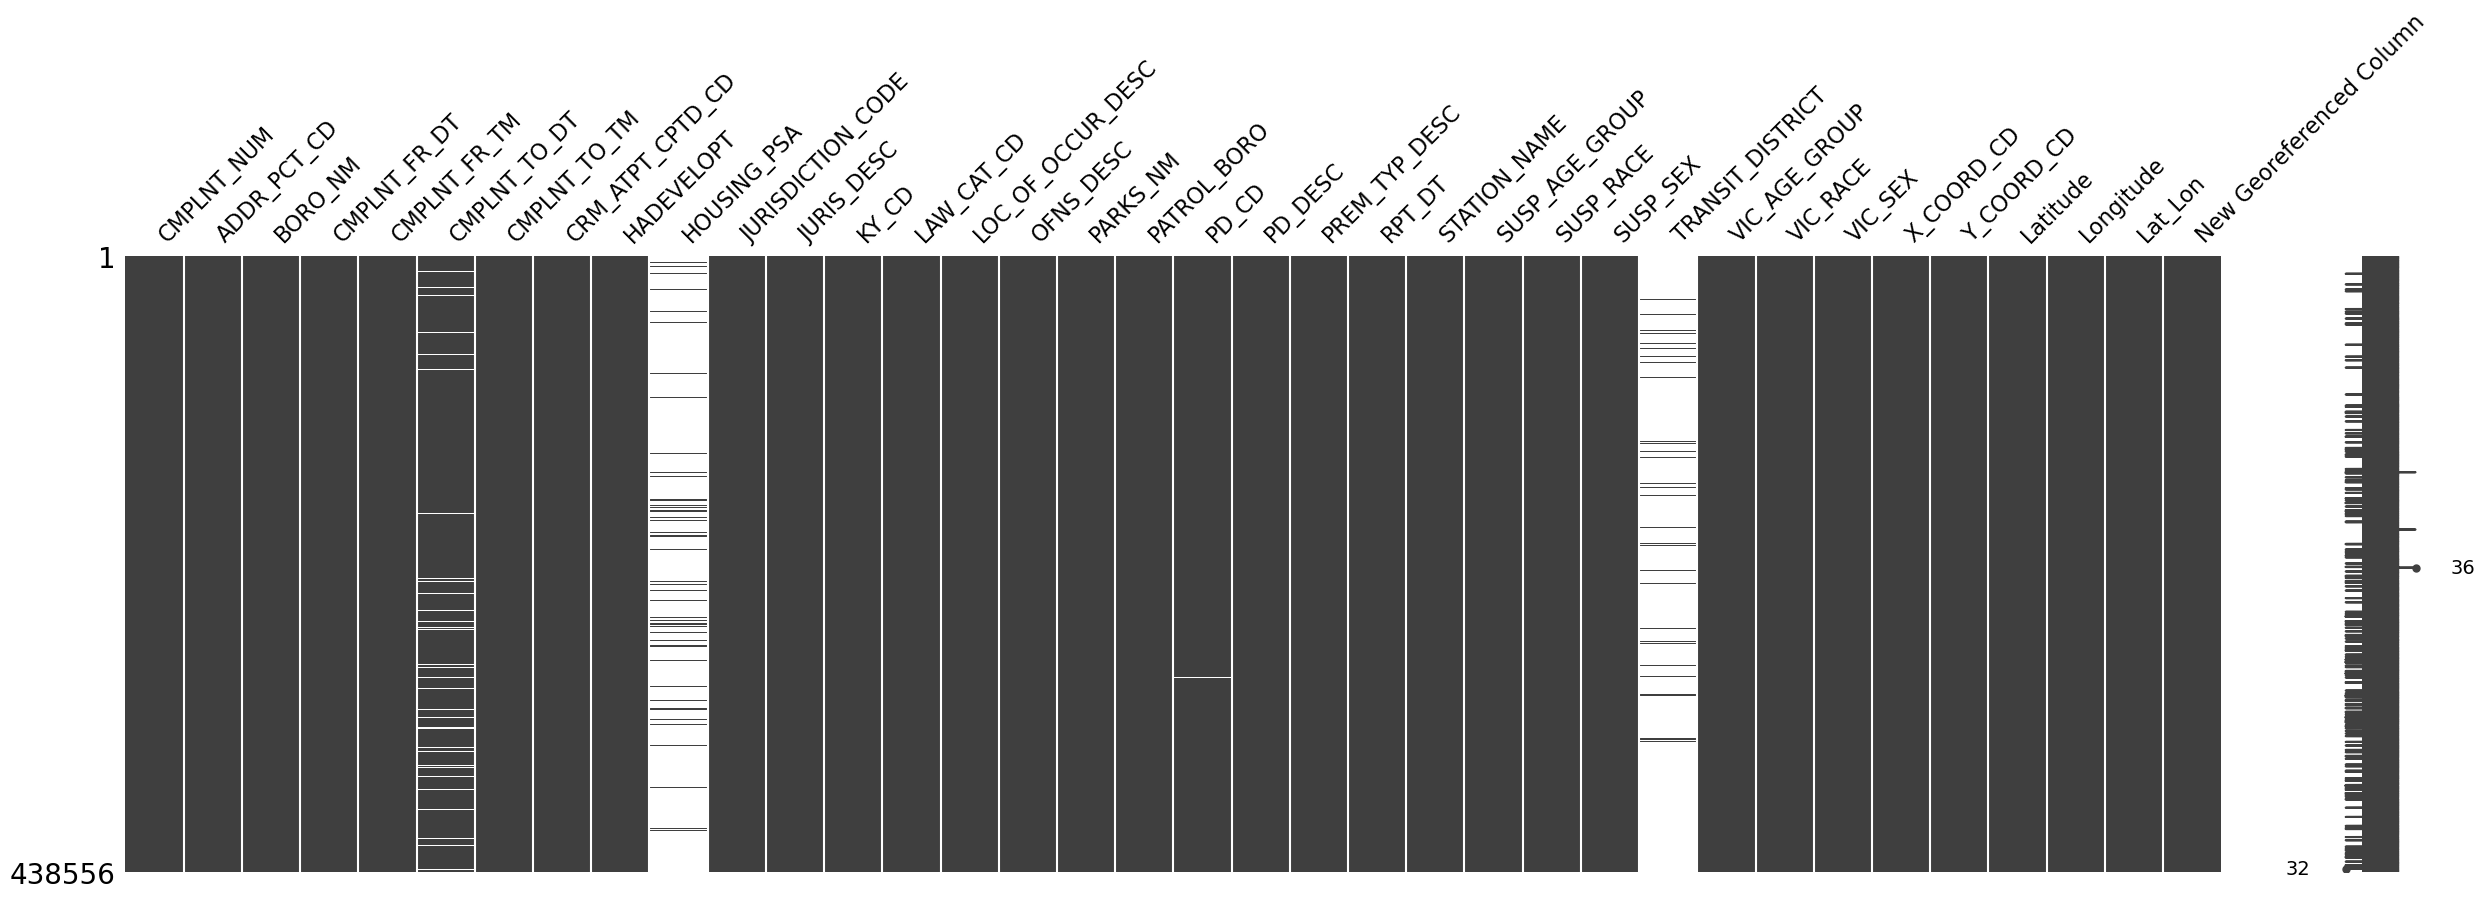

In [19]:
# Matriz de valores faltantes
msno.matrix(df, figsize=(30,8))

En este caso:

* Se observa que la mayoría de las columnas están completamente completas (barras completamente grises).

* Algunas columnas como *CMPLNT_TO_DT*, *SUSP_RACE* y *TRANSIT_DISTRICT* tienen varias ausencias visibles (líneas blancas).

* También se nota que los faltantes no están distribuidos uniformemente entre registros.

#### Dendrograma de faltantes

El **dendrograma de valores faltantes** agrupa variables (columnas) que tienden a tener valores faltantes al mismo tiempo. 

¿Qué muestra? 

* Es una jerarquía (tipo árbol) construida con una métrica de similitud entre columnas basada en los patrones de *NaN*.

* Si dos columnas suelen tener faltantes en los mismos registros, estarán cerca una de otra en el gráfico.

* Las ramas indican relaciones: columnas que comparten estructura de nulos similar se agrupan en ramas comunes.

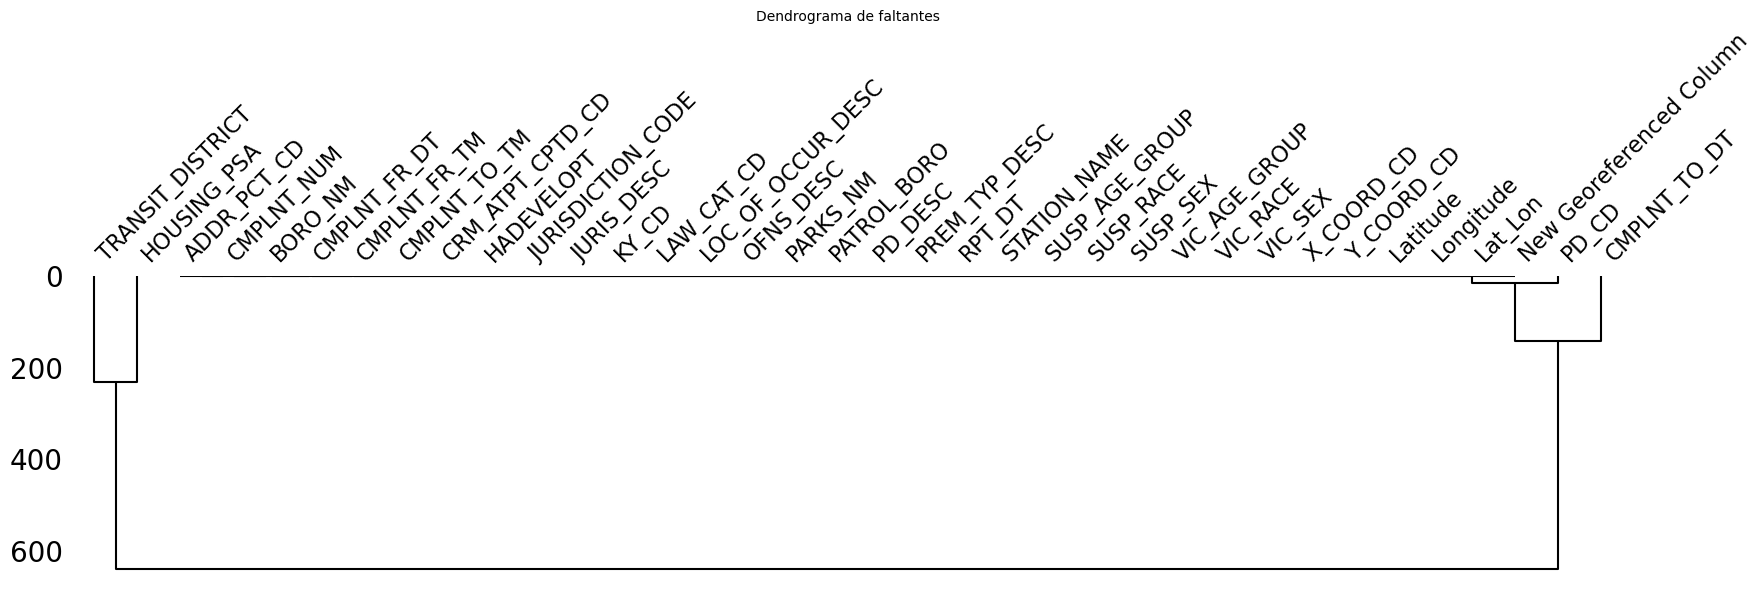

In [18]:
msno.dendrogram(df, figsize=(20,4))
plt.title('Dendrograma de faltantes', fontsize=10)
plt.show()

En este caso: 

* Las columnas *TRANSIT_DISTRICT*, *HADEVELOPT*, *PARKS_NM* y *STATION_NAME* están agrupadas, lo que sugiere que tienden a faltar en los mismos casos, probablemente porque sólo se completan en ciertos contextos (por ejemplo, delitos en subtes o en propiedad pública).

* La variable *CMPLNT_TO_DT* aparece más aislada, lo cual es coherente con su lógica: solo se llena cuando el incidente tiene duración.

### Filas duplicadas

Verificamos si hay filas duplicadas exactas en el DataFrame:

In [21]:
# Verificar duplicados
dup_count = df.duplicated().sum()
print(f"Número de filas duplicadas: {dup_count}")

Número de filas duplicadas: 0


### Conversión de tipos (fechas y horas)

Para facilitar análisis temporales (por ejemplo, delitos por mes o por día de la semana), convertiremos las columnas de fecha y hora a tipos datetime apropiados.

Las columnas de fecha (*CMPLNT_FR_DT* que es la fecha de inicio del incidente, y posiblemente *RPT_DT* que es la fecha de reporte) están en texto. Lo mismo con las horas (*CMPLNT_FR_TM*). Vamos a convertir la fecha de ocurrencia a tipo fecha, y también extraer la hora como número.

In [22]:
# Convertir columna de fecha de ocurrencia a datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], format='%m/%d/%Y', errors='coerce')

# Convertir hora de ocurrencia a datetime (y luego extraer hora)
df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time

# Crear nueva columna para la hora en formato 0-23 (entero) para análisis
df['HORA'] = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.hour

In [27]:
df['DIA_SEMANA'] = df['CMPLNT_FR_DT'].dt.day_name()   # nombre del día (Monday, Tuesday, ...)
df['MES'] = df['CMPLNT_FR_DT'].dt.month_name()        # nombre del mes (January, February, ...)

In [26]:
print(df.dtypes[['CMPLNT_FR_DT','CMPLNT_FR_TM','HORA']])
display(df.head()[['CMPLNT_FR_DT','CMPLNT_FR_TM','HORA']])
display(df.tail()[['CMPLNT_FR_DT','CMPLNT_FR_TM','HORA']])

CMPLNT_FR_DT    datetime64[ns]
CMPLNT_FR_TM            object
HORA                     int32
dtype: object


,CMPLNT_FR_DT,CMPLNT_FR_TM,HORA
0,2025-03-20,00:30:00,0
1,2025-01-02,01:50:00,1
2,2025-03-05,17:00:00,17
3,2025-05-22,14:30:00,14
4,2025-07-05,18:00:00,18


,CMPLNT_FR_DT,CMPLNT_FR_TM,HORA
438551,2025-06-10,20:00:00,20
438552,2025-08-10,16:30:00,16
438553,2025-08-04,17:10:00,17
438554,2025-02-24,19:00:00,19
438555,2025-04-10,20:00:00,20


* Para la fecha, asumimos formato mes/día/año (**'%m/%d/%Y'**). Marcamos errors='coerce' para que fechas inválidas se conviertan en NaT (nulo de fecha).

* Para la hora, formato hora:minuto:segundo (**'%H:%M:%S'**). Convertimos a tipo datetime temporalmente y luego extraemos solo la hora (.dt.hour) en una nueva columna HORA como número entero de 0 a 23.

### Otras limpiezas iniciales

Podríamos también considerar:

Estandarizar texto de columnas categóricas (por ejemplo, trim de espacios, pasar a mayúsculas/minúsculas consistente). En este dataset, las categorías ya vienen uniformes (p.ej., *BORO_NM* son nombres de barrios en mayúsculas consistentes).

Crear copias o sub-dataframes si el dataset es muy grande y solo quisiéramos analizar una porción. Pero aquí analizaremos todo el dataset ya que pandas puede manejarlo en memoria razonablemente.

Con esto, hemos preparado los datos básicos y podemos pasar a la exploración exploratoria de las variables.

## 5. Análisis univariado

En el análisis univariado examinamos una variable a la vez, para entender su distribución. Veremos tanto variables **categóricas** (discretas, texto) como **numéricas** (continuas o discretas pero tratables cuantitativamente).

### 5.1 Variables categóricas: frecuencia y visualización

Comenzaremos con variables categóricas importantes en este dataset de denuncias:

* *BORO_NM* – Borough (condado/municipio) donde ocurrió el delito. Esperamos 5 categorías: Manhattan, Bronx, Brooklyn, Queens, Staten Island.

* *LAW_CAT_CD* – Categoría legal del delito: Felony (felonía, delito grave), Misdemeanor (delito menor) o Violation (infracción menor).

* *OFNS_DESC* – Descripción del delito (por ejemplo, "ROBBERY", "ASSAULT 3", "GRAND LARCENY"). Hay muchas categorías posibles aquí, veremos las más frecuentes.

* *PREM_TYP_DESC* – Tipo de lugar del incidente (e.g., "STREET", "RESIDENCE", "RESTAURANT", etc.).

* *SUSP_SEX y VIC_SEX* – Sexo del sospechoso y de la víctima, respectivamente (valores típicos: M, F, y a veces U para desconocido).

* *SUSP_RACE y VIC_RACE* – Raza/etnicidad del sospechoso y víctima (categorías como "BLACK", "WHITE", "HISPANIC", "ASIAN", "UNKNOWN"...).

* *CRM_ATPT_CPTD_CD* – Indica si el crimen fue Completed (consumado) o Attempted (intentado, pero no logrado).

Frecuencia de la variable **BONO_NM**

In [28]:
# Frecuencia de delitos por borough
freq_boro = df['BORO_NM'].value_counts()
freq_boro_percent = df['BORO_NM'].value_counts(normalize=True) * 100

print("Frecuencia por Borough:\n", freq_boro)
print("\nPorcentaje por Borough:\n", freq_boro_percent)

Frecuencia por Borough:
 BORO_NM
BROOKLYN         122257
MANHATTAN        103595
BRONX             99029
QUEENS            94000
STATEN ISLAND     18706
(null)              969
Name: count, dtype: int64

Porcentaje por Borough:
 BORO_NM
BROOKLYN         27.877170
MANHATTAN        23.621841
BRONX            22.580697
QUEENS           21.433979
STATEN ISLAND     4.265362
(null)            0.220952
Name: proportion, dtype: float64


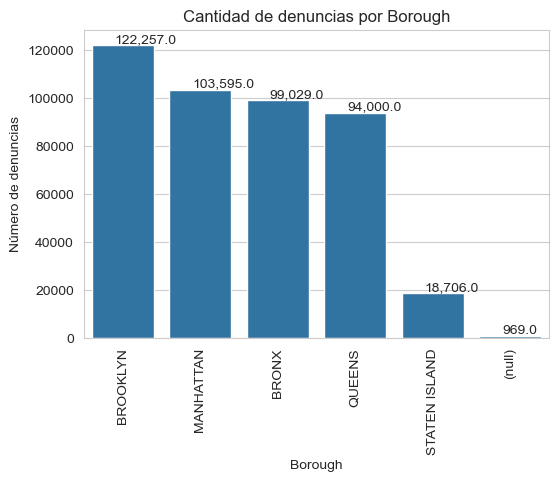

In [48]:
# Configuración estética de Seaborn
sns.set_style("whitegrid")

# Gráfico de barras de denuncias por borough
plt.figure(figsize=(6,4))
ax = sns.countplot(x='BORO_NM', data=df, order=freq_boro.index)
plt.xticks(rotation=90)
plt.title("Cantidad de denuncias por Borough")
plt.xlabel("Borough")
plt.ylabel("Número de denuncias")

# Anotamos encima de cada barra el valor
for p in ax.patches:
    ax.annotate(format(p.get_height(), ","), (p.get_x()+0.3, p.get_height()+1000), rotation=0)
plt.show()

Frecuencia de la variable **LAW_CAT_CD**

Frecuencia por tipo legal:
 LAW_CAT_CD
MISDEMEANOR    227676
FELONY         142016
VIOLATION       68864
Name: count, dtype: int64


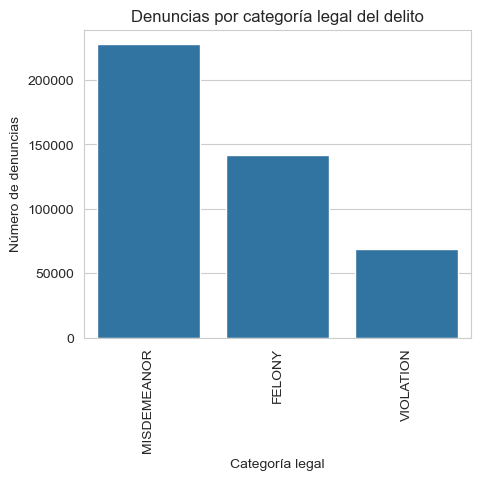

In [35]:
# Frecuencia por categoría legal (Felony/Misdemeanor/Violation)
freq_law = df['LAW_CAT_CD'].value_counts()
print("Frecuencia por tipo legal:\n", freq_law)

plt.figure(figsize=(5,4))
sns.countplot(x='LAW_CAT_CD', data=df, order=freq_law.index)
plt.xticks(rotation=90)
plt.title("Denuncias por categoría legal del delito")
plt.xlabel("Categoría legal")
plt.ylabel("Número de denuncias")
plt.show()

In [37]:
# Top 10 descripciones de delito más frecuentes
top10_ofns = df['OFNS_DESC'].value_counts().nlargest(10)
print("Top 10 delitos más frecuentes:\n", top10_ofns)

Top 10 delitos más frecuentes:
 OFNS_DESC
PETIT LARCENY                     79336
HARRASSMENT 2                     64920
ASSAULT 3 & RELATED OFFENSES      46288
GRAND LARCENY                     35643
CRIMINAL MISCHIEF & RELATED OF    27520
FELONY ASSAULT                    22442
VEHICLE AND TRAFFIC LAWS          18950
MISCELLANEOUS PENAL LAW           15262
DANGEROUS DRUGS                   14354
OFF. AGNST PUB ORD SENSBLTY &     13708
Name: count, dtype: int64


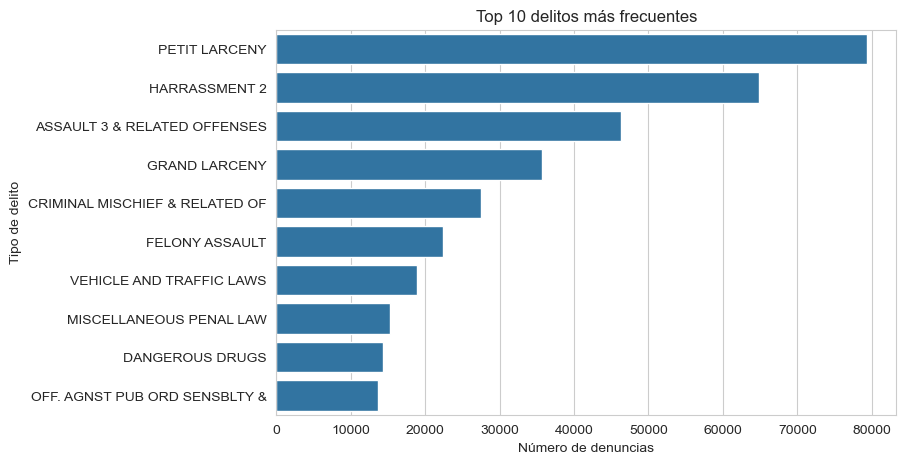

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(y=top10_ofns.index, x=top10_ofns.values)
plt.title("Top 10 delitos más frecuentes")
plt.xlabel("Número de denuncias")
plt.ylabel("Tipo de delito")
plt.show()

Frecuencia de la variable **PREM_TYP_DESC**

In [41]:
# Frecuencia de los distintos tipos de lugares (premises) - top 5
prem_counts = df['PREM_TYP_DESC'].value_counts()
print("Tipos de lugar más comunes:\n", prem_counts.head(5))

Tipos de lugar más comunes:
 PREM_TYP_DESC
STREET                        134132
RESIDENCE - APT. HOUSE         94769
RESIDENCE-HOUSE                39394
RESIDENCE - PUBLIC HOUSING     26975
TRANSIT - NYC SUBWAY           25751
Name: count, dtype: int64


Frecuencia de las variables **SUP_SEX** & **VIC_SEX**

In [42]:
print("Distribución sexo del sospechoso:\n", df['SUSP_SEX'].value_counts(dropna=False))
print("Distribución sexo de la víctima:\n", df['VIC_SEX'].value_counts(dropna=False))

Distribución sexo del sospechoso:
 SUSP_SEX
M         237329
U          89863
F          67374
(null)     43990
Name: count, dtype: int64
Distribución sexo de la víctima:
 VIC_SEX
F    154115
M    138727
E     81846
D     61365
L      2503
Name: count, dtype: int64


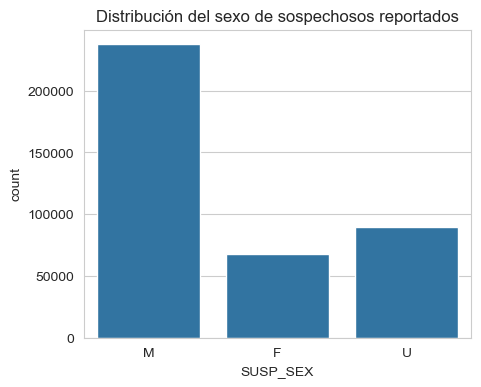

In [47]:
plt.figure(figsize=(5,4))
sns.countplot(x='SUSP_SEX', data=df, order=['M','F','U'])
plt.title("Distribución del sexo de sospechosos reportados")
plt.show()

Observaciones univariadas

* Boroughs: Vemos que ciertos boroughs concentran más denuncias. Esto puede relacionarse con la población y actividad: Brooklyn y Manhattan suelen liderar en cantidad de incidentes, mientras Staten Island tiene muy pocos casos comparativamente.

* Tipo legal del delito: Los Misdemeanors dominan, lo que sugiere que la mayoría de eventos reportados son de menor gravedad relativa. Las Felonies también son numerosas pero menores en cantidad, y las Violations (infracciones) son la menor proporción.

* Delitos más frecuentes: Delitos contra la propiedad como hurtos (larceny) aparecen al tope, así como ofensas menores (acoso, daños a propiedad, posesión de drogas). Estos datos reflejan los tipos de crimen más comunes que maneja la policía.

* Tipos de lugares: (Si analizamos) posiblemente residencias y la vía pública sean los escenarios más frecuentes de delitos.

* Sexo de sospechosos/víctimas: Podría observarse, por ejemplo, más sospechosos masculinos reportados que femeninos, y en víctimas quizás una distribución más equitativa entre hombres y mujeres dependiendo del delito (esto sería interesante de cruzar luego con tipo de delito).

### 5.2 Variables numéricas: distribución (histograma, boxplot, estadísticas)

En este dataset, la mayoría de las columnas son categóricas (incluso las que son números son códigos o IDs). No tenemos, por ejemplo, una columna de edad numérica directa (solo rangos de edad categóricos), ni montos, duraciones, etc.

Sin embargo, podemos analizar alguna variable derivada numérica para ilustrar técnicas de EDA:

* La columna HORA que creamos (hora del día en que ocurrió el delito, de 0 a 23) es de tipo numérico discreto y nos permite ver a qué horas ocurren más incidentes.

* Otra posibilidad es analizar la distribución temporal por fecha (ejemplo, cuántos incidentes por día), aunque eso es más una serie de tiempo que una distribución univariada simple. Nos centraremos en la hora del día como variable numérica para demostrar histograma y boxplot.

#### Histograma de la hora del día (*HORA*)

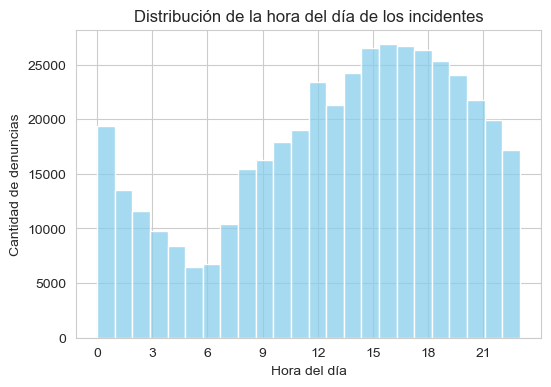

In [51]:
plt.figure(figsize=(6,4))
sns.histplot(df['HORA'].dropna(), bins=24, color='skyblue')
plt.title("Distribución de la hora del día de los incidentes")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de denuncias")
plt.xticks(range(0,24,3))  # marcas cada 3 horas por claridad
plt.show()

¿Qué se observa?
* Horas bajas: muy de madrugada (3-6 AM) suele haber menos incidentes.
* Incremento: las denuncias tienden a subir en horas de la tarde y noche. Posiblemente haya un pico en horas alrededor de las 16-17 PM (salida del trabajo) y hacia la noche (20 PM - 23 PM) dependiendo del tipo de delitos (la vida nocturna puede influir en ciertos crímenes).

#### Medidas estadísticas básicas para *HORA*:

In [43]:
print(df['HORA'].describe())

count    438556.000000
mean         13.242861
std           6.505167
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: HORA, dtype: float64


Esto nos dará el conteo de valores no nulos, la media, desviación estándar, valores mínimos y máximos, y los cuartiles de la distribución de horas.

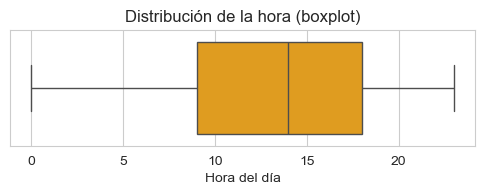

In [44]:
plt.figure(figsize=(6,1.5))
sns.boxplot(x=df['HORA'], color='orange')
plt.title("Distribución de la hora (boxplot)")
plt.xlabel("Hora del día")
plt.show()

Interpretación del gráfico:
* Mediana (línea dentro de la caja): está cerca de la hora 13 o 14, lo que indica que la mitad de los delitos ocurre antes y después de esa hora aproximadamente (entre la 1 y 2 PM).

* Rango intercuartílico (IQR):

    * El Q1 (25%) está en la hora 9 aproximadamente.

    * El Q3 (75%) está en la hora 18.

    * Esto significa que el 50% de las denuncias se concentran entre las 9 AM y 18 PM, lo cual sugiere que las actividades delictivas tienden a estar asociadas a horarios de mayor actividad pública.

* Bigotes (líneas horizontales a los lados de la caja):

    * Alcanzan hasta las horas 0 y 23 (medianoche y 23 PM), lo que indica que no hay valores atípicos (outliers) en esta variable.

    * Esto es esperable, ya que la variable hora sólo puede tomar valores enteros entre 0 y 23, por lo tanto, el rango de posibles outliers es acotado naturalmente.

* Simetría: la caja está más extendida hacia la izquierda, lo que indica una leve asimetría negativa (más casos acumulados en la tarde que en la mañana), aunque no muy marcada.

## 6. Análisis multivariado

En el análisis multivariado examinamos relaciones entre dos o más variables. Nos enfocaremos en cruces sencillos pero ilustrativos para este dataset:

* Cruce de variables categóricas: por ejemplo, analizar cómo se distribuyen los tipos de delito según el borough, o según el mes. Veremos tablas de contingencia y gráficos de barras agrupadas.

* Cruce de variable categórica con temporal: por ejemplo, ver la tendencia de denuncias a lo largo de los meses del año, posiblemente diferenciando por categoría de delito.

* Visualizaciones: utilizaremos gráficos de barras agrupadas (con hue en seaborn) y quizá un heatmap si es pertinente (por ejemplo, una matriz de calor de denuncias por mes y borough).

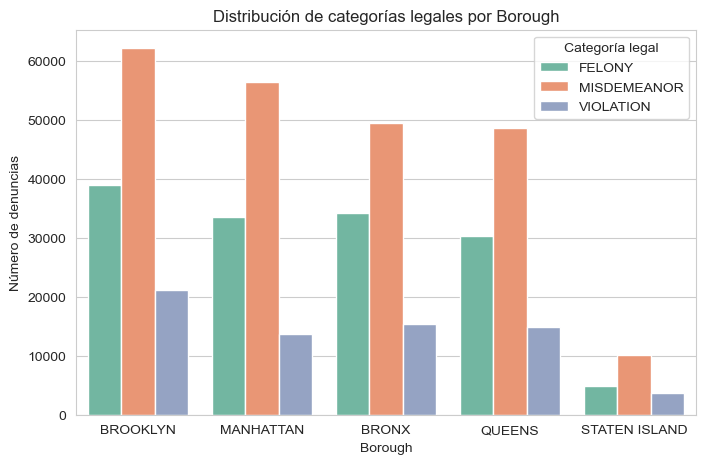

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x='BORO_NM', hue='LAW_CAT_CD', data=df,
              order=['BROOKLYN','MANHATTAN','BRONX','QUEENS','STATEN ISLAND'],
              palette='Set2')
plt.title("Distribución de categorías legales por Borough")
plt.xlabel("Borough")
plt.ylabel("Número de denuncias")
plt.legend(title="Categoría legal")
plt.show()

In [53]:
contingency = pd.crosstab(df['BORO_NM'], df['LAW_CAT_CD'], normalize='index') * 100
print("Porcentaje de delitos por categoría en cada Borough:\n", contingency)

Porcentaje de delitos por categoría en cada Borough:
 LAW_CAT_CD        FELONY  MISDEMEANOR  VIOLATION
BORO_NM                                         
(null)          0.619195    99.380805   0.000000
BRONX          34.558564    49.914671  15.526765
BROOKLYN       31.810857    50.843714  17.345428
MANHATTAN      32.406004    54.388725  13.205271
QUEENS         32.317021    51.796809  15.886170
STATEN ISLAND  26.446060    53.939912  19.614028


In [54]:
df['MES'] = df['CMPLNT_FR_DT'].dt.month  # como número 1-12
# También podríamos usar .dt.month_name() para nombre, pero número es útil para ordenar cronológicamente.

In [55]:
monthly_counts = df.groupby(['MES','LAW_CAT_CD']).size().reset_index(name='count')
display(monthly_counts.head(6))

,MES,LAW_CAT_CD,count
0,1.0,FELONY,14768
1,1.0,MISDEMEANOR,24916
2,1.0,VIOLATION,7031
3,2.0,FELONY,13255
4,2.0,MISDEMEANOR,22633
5,2.0,VIOLATION,6499


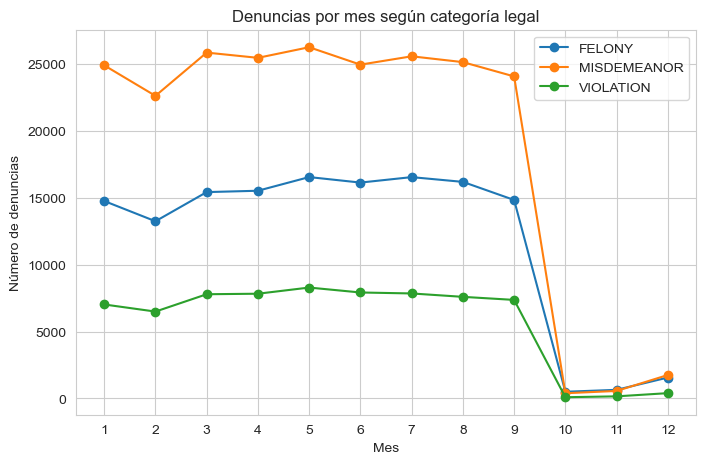

In [56]:
# Pivotear para tener columnas Felony/Misdemeanor/Violation por mes
pivot_month_cat = monthly_counts.pivot(index='MES', columns='LAW_CAT_CD', values='count').fillna(0)

# Graficar la tendencia por mes para cada categoría legal
plt.figure(figsize=(8,5))
for cat in ['FELONY','MISDEMEANOR','VIOLATION']:
    plt.plot(pivot_month_cat.index, pivot_month_cat[cat], marker='o', label=cat)
plt.title("Denuncias por mes según categoría legal")
plt.xlabel("Mes")
plt.ylabel("Número de denuncias")
plt.xticks(range(1,13))
plt.legend()
plt.show()

In [57]:
df['DIA_SEMANA'] = df['CMPLNT_FR_DT'].dt.day_name()  # ejemplo: Monday, Tuesday, ...

In [58]:
heat_data = pd.crosstab(df['DIA_SEMANA'], df['HORA'])
# Reordenar filas para que vayan de Lunes a Domingo
dias_orden = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heat_data = heat_data.reindex(dias_orden)

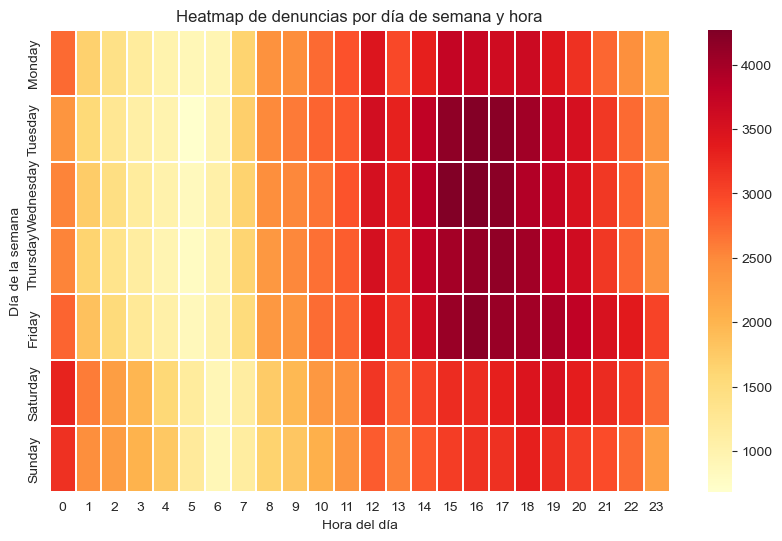

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(heat_data, cmap="YlOrRd", linewidths=0.1)
plt.title("Heatmap de denuncias por día de semana y hora")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()

## 7. Identificación y análisis de valores faltantes (MCAR, MAR, MNAR)

En la sección de limpieza inicial ya contamos los valores faltantes por columna. Ahora profundicemos en su análisis, tanto en qué datos faltan en nuestro dataset como en los motivos de la ausencia, introduciendo los conceptos teóricos de MCAR, MAR y MNAR:

* **Missing Completely At Random (MCAR)**: datos faltantes completamente al azar. La causa de que falten datos no está relacionada con ninguna variable del dataset ni con el valor faltante; es puro azar. Si los datos son MCAR, los registros con datos faltantes son esencialmente una muestra aleatoria de todos los registros. En la práctica, MCAR estricto es raro.

* **Missing At Random (MAR)**: datos faltantes al azar condicional. La ausencia de datos puede explicarse totalmente por otras variables observadas, pero no depende del valor faltante en sí. En otras palabras, dado lo que sí sabemos de un caso, la probabilidad de que cierto campo esté vacío puede no ser uniforme, pero se debe a otra variable conocida. (Ejemplo: si hombres tienden a no responder cierta pregunta pero mujeres sí, la falta depende del género - observado - y no del valor verdadero que falta).

* **Missing Not At Random (MNAR)**: datos faltantes no al azar. La falta de datos sí depende del valor faltante o de factores no observados. Es decir, el hecho de que un valor falte tiene que ver con el propio valor. Ejemplo clásico: si personas con ingresos muy altos tienden a omitir responder su ingreso en una encuesta, los valores faltantes de ingreso no son aleatorios; dependen del ingreso mismo (los más altos faltan).

Ahora, mirando nuestro dataset:

* Vemos que columnas como *SUSP_SEX*, *SUSP_RACE*, *SUSP_AGE_GROUP* (información del sospechoso) tienen muchos valores faltantes. ¿Por qué? Principalmente porque en muchas denuncias no hay un sospechoso identificado (casos sin arresto o sin descripción del perpetrador). La ausencia aquí claramente no es al azar: falta porque no hubo datos del sospechoso, lo cual probablemente correlaciona con el tipo de delito o circunstancia (por ejemplo, en muchos hurtos menores no se atrapa al culpable). Podríamos considerarlo MNAR, ya que la falta está intrínsecamente ligada a la condición "sospechoso no identificado".

* Columnas como *VIC_AGE_GROUP* casi siempre deberían estar presentes porque normalmente la víctima sí reporta su edad (o rango de edad). Si faltaran algunas, podría ser MAR (quizá falta más en ciertos tipos de casos donde la víctima no dio su edad).

* Campos de ubicación específica como *PARKS_NM** (nombre de parque) o *TRANSIT_DISTRICT* solo se rellenan cuando aplican. Por ejemplo, PARKS_NM solo tiene dato si el incidente ocurrió en un parque; en la mayoría de casos estará vacío. Esto es un caso de missing por diseño: no es realmente "desconocido", sino "No aplica". En términos de nuestros mecanismos, es MNAR (depende de la localización: si no es parque, falta el nombre de parque) o podría verse como algo determinista más que aleatorio.

In [60]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

CMPLNT_FR_DT             5
CMPLNT_TO_DT         20328
HOUSING_PSA         411370
PD_CD                  243
TRANSIT_DISTRICT    412298
DIA_SEMANA               5
MES                      5
dtype: int64


En este caso, se puede observar que:

* Las columnas *HOUSING_PSA* y *TRANSIT_DISTRICT* tienen una gran cantidad de nulos (más de 400,000), lo cual indica que los valores faltantes no son aleatorios: están probablemente relacionados con el tipo de lugar o jurisdicción (por ejemplo, sólo aplican a ciertas denuncias).
  
* Columnas como *CMPLNT_FR_DT* y *DIA_SEMANA* tienen apenas 5 valores faltantes, lo cual puede deberse a errores puntuales o registros incompletos.